<a href="https://colab.research.google.com/github/FGalvao77/Conhecendo-o-XGBoost-e-tunando-seus-parametros-principais/blob/main/Conhecendo_o_XGBoost_e_tunando_seus_par%C3%A2metros_principais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conhecendo o `XGBoost` e tunando seus parâmetros principais**

---



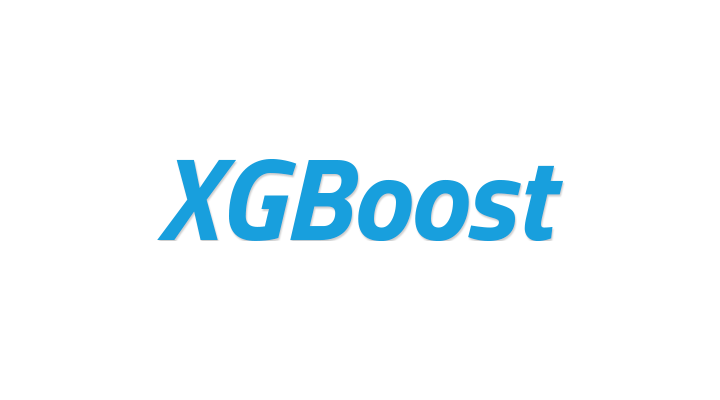

XGBoost é uma biblioteca otimizada de aumento de gradiente distribuída projetada para ser altamente eficiente , flexível e portátil . Ele implementa algoritmos de aprendizado de máquina sob a estrutura [Gradient Boosting](https://en.wikipedia.org/wiki/Gradient_boosting). O XGBoost fornece um aumento de árvore paralela (também conhecido como GBDT, GBM) que resolve muitos problemas de ciência de dados de maneira rápida e precisa. O mesmo código é executado em grandes ambientes distribuídos (Hadoop, SGE, MPI) e pode resolver problemas além de bilhões de exemplos.



Vamos entender como funciona o `XGBoot` e, como melhor utilizá-lo `tunando` alguns parâmetros para obter o "melhor" modelo.

### **XGBoost**

- [Documentação](https://xgboost.readthedocs.io/en/stable/index.html)

- Material extra para consulta:
 - [Paper XGBoost](https://arxiv.org/pdf/1603.02754.pdf)
 - [Gradient Boosting na Wikipedia](https://en.wikipedia.org/wiki/Gradient_boosting)
 - [Paper Gradient Boosting](https://jerryfriedman.su.domains/ftp/trebst.pdf)

Vamos aprender sobre `XCBoost` utilizando o mesmo conjunto de dados `california_housing_train.csv`.

Iremos aplicando o modelo e **tunando** alguns parâmetros até encontrarmos o "melhor" modelo.

In [ ]:
# bibliotecas necessárias
import pandas as pd     # para modelagem de dados                 
import numpy as np      # para modelagem matemática

In [ ]:
# importando o conjunto de dados
data = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
# dimensão do conjunto de dados
data.shape      # linhas e colunas

(17000, 9)

In [ ]:
# informações gerais
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
# importando as bibliotecas
from xgboost import XGBRegressor                            # modelo para regressão
from sklearn.model_selection import train_test_split        # para particionamento dos dados - treino e validação
from sklearn.metrics import mean_squared_error              # métrica de avalição do modelo - erro média quadrático

In [ ]:
# instanciando as variáveis explicativas (X) e a resposta (y)
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [ ]:
# particionando os dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  train_size=0.6,   # 60% para treino e, o restante 40% para validação do modelo
                                                  random_state=42)  # parâmetro de repetibilidade

In [ ]:
model_xgboost1 = XGBRegressor(random_state=42)

In [ ]:
model_xgboost1.fit(X_train, y_train)

pred = model_xgboost1.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[10:34:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


55353.78450709792

In [ ]:
model_xgboost2 = XGBRegressor(learning_rate=0.01,
                              n_estimators=500,
                              random_state=42)

model_xgboost2.fit(X_train, y_train)

pred = model_xgboost2.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[10:34:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


61474.540693567076

Agora iremos utilizar a `GPU` do **google colab**, para isso é necessário habilitar o _ambiente de execução_ para prosseguir na aplicação dos próximos modelos.

In [ ]:
model_xgboost3 = XGBRegressor(learning_rate=0.01,
                              n_estimators=100,
                            #   max_depth=
                              random_state=42, 
                              gpu_id='0',
                              tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost3.fit(X_train, y_train)

pred = model_xgboost3.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[10:34:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


115603.28386137784

In [ ]:
model_xgboost4 = XGBRegressor(learning_rate=0.02,
                              n_estimators=100,
                            #   max_depth=
                              random_state=42, 
                              gpu_id='0',
                              tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost4.fit(X_train, y_train)

pred = model_xgboost4.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[10:34:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


80587.27007475324

In [ ]:
model_xgboost5 = XGBRegressor(learning_rate=0.05,
                              n_estimators=100,
                            #   max_depth=
                              random_state=42, 
                              gpu_id='0',
                              tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost5.fit(X_train, y_train)

pred = model_xgboost5.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[10:34:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


61104.219176357656

In [ ]:
model_xgboost6 = XGBRegressor(learning_rate=0.08,
                              n_estimators=100,
                            #   max_depth=
                              random_state=42, 
                              gpu_id='0',
                              tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost6.fit(X_train, y_train)

pred = model_xgboost6.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[10:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


56940.377846007264

In [ ]:
model_xgboost7 = XGBRegressor(learning_rate=0.13,
                              n_estimators=100,
                            #   max_depth=
                              random_state=42, 
                              gpu_id='0',
                              tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost7.fit(X_train, y_train)

pred = model_xgboost7.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[10:35:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


53102.78216967317

In [ ]:
model_xgboost8 = XGBRegressor(learning_rate=0.13,
                              n_estimators=200,
                            #   max_depth=
                              random_state=42, 
                              gpu_id='0',
                              tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost8.fit(X_train, y_train)

pred = model_xgboost8.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[10:35:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


50430.500264329436

In [ ]:
model_xgboost9 = XGBRegressor(learning_rate=0.13,
                              n_estimators=300,
                            #   max_depth=
                              random_state=42, 
                              gpu_id='0',
                              tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost9.fit(X_train, y_train)

pred = model_xgboost9.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[10:35:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


49533.21095385583

In [ ]:
model_xgboost10 = XGBRegressor(learning_rate=0.13,
                               n_estimators=400,
                             #   max_depth=
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost10.fit(X_train, y_train)

pred = model_xgboost10.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[10:35:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


49130.40023489709

In [ ]:
model_xgboost11 = XGBRegressor(learning_rate=0.13,
                               n_estimators=500,
                            #    max_depth=
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost11.fit(X_train, y_train)

pred = model_xgboost11.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[10:35:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


48979.08163525451

In [ ]:
model_xgboost12 = XGBRegressor(learning_rate=0.13,
                               n_estimators=600,
                             #   max_depth=
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost12.fit(X_train, y_train)

pred = model_xgboost12.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[10:35:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


48715.98882316679

In [ ]:
model_xgboost13 = XGBRegressor(learning_rate=0.13,
                               n_estimators=700,
                             #   max_depth=
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost13.fit(X_train, y_train)

pred = model_xgboost13.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[10:35:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


48539.19881867207

In [ ]:
model_xgboost14 = XGBRegressor(learning_rate=0.13,
                               n_estimators=800,
                             #   max_depth=
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost14.fit(X_train, y_train)

pred = model_xgboost14.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[10:35:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


48348.01721742729

In [ ]:
model_xgboost15 = XGBRegressor(learning_rate=0.13,
                               n_estimators=900,
                             #   max_depth=
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost15.fit(X_train, y_train)

pred = model_xgboost15.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[10:36:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


48326.419441637176

In [ ]:
model_xgboost16 = XGBRegressor(learning_rate=0.13,
                               n_estimators=1000,
                             #   max_depth=
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost16.fit(X_train, y_train)

pred = model_xgboost16.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[23:27:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


48242.53780314769

In [ ]:
model_xgboost17 = XGBRegressor(learning_rate=0.13,
                               n_estimators=1200,
                             #   max_depth=
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost17.fit(X_train, y_train)

pred = model_xgboost17.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[23:28:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


48195.43620988082

In [ ]:
model_xgboost18 = XGBRegressor(learning_rate=0.13,
                               n_estimators=1500,
                             #   max_depth=
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost18.fit(X_train, y_train)

pred = model_xgboost18.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[23:28:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


48128.35694883369

In [ ]:
model_xgboost19 = XGBRegressor(learning_rate=0.13,
                               n_estimators=1600,
                             #   max_depth=
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost19.fit(X_train, y_train)

pred = model_xgboost19.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[23:29:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


48083.806401622365

In [ ]:
model_xgboost20 = XGBRegressor(learning_rate=0.13,
                               n_estimators=1620,
                             #   max_depth=
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost20.fit(X_train, y_train)

pred = model_xgboost20.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[23:29:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


48087.01525450591

In [ ]:
model_xgboost21 = XGBRegressor(learning_rate=0.13,
                               n_estimators=1650,
                             #   max_depth=
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost21.fit(X_train, y_train)

pred = model_xgboost21.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[23:29:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


48112.12501169762

In [ ]:
model_xgboost22 = XGBRegressor(learning_rate=0.08,
                               n_estimators=1300,
                             #   max_depth=
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost22.fit(X_train, y_train)

pred = model_xgboost22.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[23:30:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


48398.268016721886

In [ ]:
model_xgboost23 = XGBRegressor(learning_rate=0.08,
                               n_estimators=1300,
                               max_depth=2,
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost23.fit(X_train, y_train)

pred = model_xgboost23.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[23:30:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


50512.85417250687

In [ ]:
model_xgboost24 = XGBRegressor(learning_rate=0.08,
                               n_estimators=1300,
                               max_depth=3,
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost24.fit(X_train, y_train)

pred = model_xgboost24.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[23:31:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


48398.268016721886

In [ ]:
model_xgboost25 = XGBRegressor(learning_rate=0.08,
                               n_estimators=1300,
                               max_depth=4,
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost25.fit(X_train, y_train)

pred = model_xgboost25.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[23:32:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


47517.41473540129

In [ ]:
model_xgboost26 = XGBRegressor(learning_rate=0.08,
                               n_estimators=1300,
                               max_depth=5,
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost26.fit(X_train, y_train)

pred = model_xgboost26.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[23:32:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


47570.438835492576

In [ ]:
model_xgboost27 = XGBRegressor(learning_rate=0.08,
                               n_estimators=1300,
                               max_depth=6,
                               min_child_weight=2,
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost27.fit(X_train, y_train)

pred = model_xgboost27.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[23:32:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


47432.599371106444

In [ ]:
model_xgboost28 = XGBRegressor(learning_rate=0.08,
                               n_estimators=1300,
                               max_depth=6,
                               min_child_weight=3,
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost28.fit(X_train, y_train)

pred = model_xgboost28.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[23:33:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


47168.250247240154

In [ ]:
model_xgboost29 = XGBRegressor(learning_rate=0.08,
                               n_estimators=1300,
                               max_depth=6,
                               min_child_weight=4,
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost29.fit(X_train, y_train)

pred = model_xgboost29.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[23:52:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


47050.11331849348

In [ ]:
model_xgboost30 = XGBRegressor(learning_rate=0.08,
                               n_estimators=1300,
                               max_depth=6,
                               min_child_weight=5,
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost30.fit(X_train, y_train)

pred = model_xgboost30.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[23:52:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


47418.858661381586

In [ ]:
model_xgboost31 = XGBRegressor(learning_rate=0.08,
                               n_estimators=1300,
                               max_depth=6,
                               min_child_weight=4,
                               subsample=0.5,
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost31.fit(X_train, y_train)

pred = model_xgboost31.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[23:53:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


47395.71413204704

In [ ]:
model_xgboost32 = XGBRegressor(learning_rate=0.08,
                               n_estimators=1300,
                               max_depth=6,
                               min_child_weight=4,
                               subsample=0.75,
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost32.fit(X_train, y_train)

pred = model_xgboost32.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[23:53:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


46622.12560813702

In [ ]:
model_xgboost33 = XGBRegressor(learning_rate=0.08,
                               n_estimators=1300,
                               max_depth=6,
                               min_child_weight=4,
                               subsample=0.8,
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost33.fit(X_train, y_train)

pred = model_xgboost33.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[23:53:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


46794.76009264559

In [ ]:
model_xgboost34 = XGBRegressor(learning_rate=0.08,
                               n_estimators=1300,
                               max_depth=6,
                               min_child_weight=4,
                               subsample=0.75,
                               colsample_bynode=0.5,
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab
                               
model_xgboost34.fit(X_train, y_train)

pred = model_xgboost34.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[23:54:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


47277.05566854636

In [ ]:
model_xgboost35 = XGBRegressor(learning_rate=0.08,
                               n_estimators=1300,
                               max_depth=6,
                               min_child_weight=4,
                               subsample=0.25,
                               colsample_bynode=0.5,
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost35.fit(X_train, y_train)

pred = model_xgboost35.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[23:54:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


49160.611810359915

In [ ]:
model_xgboost36 = XGBRegressor(learning_rate=0.08,
                               n_estimators=1300,
                               max_depth=6,
                               min_child_weight=4,
                               subsample=0.8,
                               colsample_bynode=0.5,
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost36.fit(X_train, y_train)

pred = model_xgboost36.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[23:54:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


46980.53191338057

In [ ]:
model_xgboost37 = XGBRegressor(learning_rate=0.08,
                               n_estimators=1300,
                               max_depth=6,
                               min_child_weight=4,
                               subsample=0.85,
                               colsample_bynode=0.5,
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost37.fit(X_train, y_train)

pred = model_xgboost37.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[23:55:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


46903.30238314819

In [ ]:
model_xgboost38 = XGBRegressor(learning_rate=0.08,
                               n_estimators=1300,
                               max_depth=6,
                               min_child_weight=4,
                               subsample=0.9,
                               colsample_bynode=0.5,
                               random_state=42, 
                               gpu_id='0',
                               tree_method='exact') # parâmetro para utilizar a gpu do colab

model_xgboost38.fit(X_train, y_train)

pred = model_xgboost38.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[23:55:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


46913.16813365094

In [ ]:
model_xgboost39 = XGBRegressor(learning_rate=0.08,
                               n_estimators=1300,
                               max_depth=6,
                               min_child_weight=4,
                               subsample=0.9,
                               colsample_bynode=0.5,
                               random_state=42, 
                               num_parallel_tree=2,
                            #    gpu_id='0',           # parâmetro para utilizar a gpu do colab
                            #    tree_method='exact'
                               ) 

model_xgboost39.fit(X_train, y_train)

pred = model_xgboost39.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[10:39:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


46514.07601758921

In [ ]:
model_xgboost40 = XGBRegressor(learning_rate=0.08,
                               n_estimators=1300,
                               max_depth=6,
                               min_child_weight=4,
                               subsample=0.9,
                               colsample_bynode=0.5,
                               random_state=42, 
                               num_parallel_tree=2,
                               gpu_id='0',           # parâmetro para utilizar a gpu do colab
                               tree_method='exact'   
                               ) 

model_xgboost40.fit(X_train, y_train)

pred = model_xgboost40.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[10:42:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


46514.07601758921

In [ ]:
model_xgboost41 = XGBRegressor(learning_rate=0.08,
                               n_estimators=1300,
                               max_depth=6,
                               min_child_weight=4,
                               subsample=0.9,
                               colsample_bynode=0.5,
                               random_state=42, 
                               num_parallel_tree=3,
                            #    gpu_id='0',           # parâmetro para utilizar a gpu do colab
                            #    tree_method='exact'   
                               ) 

model_xgboost41.fit(X_train, y_train)

pred = model_xgboost41.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[10:43:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


46288.9648202321

In [ ]:
model_xgboost42 = XGBRegressor(learning_rate=0.08,
                               n_estimators=1300,
                               max_depth=6,
                               min_child_weight=4,
                               subsample=0.9,
                               colsample_bynode=0.5,
                               random_state=42, 
                               num_parallel_tree=3,
                               booster='gbtree',
                            #    gpu_id='0',           # parâmetro para utilizar a gpu do colab
                            #    tree_method='exact'   
                               ) 

model_xgboost42.fit(X_train, y_train)

pred = model_xgboost42.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

[10:47:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


46288.9648202321

In [ ]:
model_xgboost43 = XGBRegressor(learning_rate=0.08,
                               n_estimators=1300,
                               max_depth=6,
                               min_child_weight=4,
                               subsample=0.9,
                               colsample_bynode=0.5,
                               random_state=42, 
                               num_parallel_tree=3,
                               booster='gbtree',
                               objective='reg:squarederror',
                            #    gpu_id='0',           # parâmetro para utilizar a gpu do colab
                            #    tree_method='exact'   
                               ) 

model_xgboost43.fit(X_train, y_train)

pred = model_xgboost43.predict(X_val)

np.sqrt(mean_squared_error(pred, y_val))

46288.9648202321

### **Vídeo-aula:**
- [Mario Filho](https://www.youtube.com/playlist?list=PLwnip85KhroUBuVfAEUz4jE5ejQ5vXf6N)

### Conheça mais em:            
- Medium:    
 - [Understanding XGBoost & it’s growing popularity among the ML community](https://medium.com/analytics-vidhya/understanding-xgboost-its-growing-popularity-among-the-ml-community-6f12dc25b44b)
 